
        keys, values = list(rel_info.keys()), list(rel_info.values())
        values[0] = int(values[0])
        keys += ['_name_or_path', 'vocab_size']
        values += [config_info['_name_or_path'], config_info['vocab_size']]
        if(create_df == True):
            df = pd.DataFrame(data = [values], columns=keys)
            create_df = False
        else:
            df.loc[len(df)] = values


In [312]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from glob import glob
import math
from typing import List
#from data_prep_utils import 

In [12]:
### create a dataframe table containing all loss and train of a tokenizer


# get a path of a directory containg all directories of tokenizers

tokenizers_directory = "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece"

# navigate into the directory and list all tokenizers directories inside
tokenizers_path = glob(tokenizers_directory+"/*/", recursive= True)
tokenizers_path[:2]


['/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_8_vocab-1800/',
 '/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-1800/']

In [385]:
## adjust to reading the trainer_state.json
## adapted version


def loss_info_df_(tokenizers_path : str, 
                 data_path : str = None, df_title : str = None, save_df=False):

    total_dict = []
    ## tokenizers_directory : path to a directory containg models trained on mlm
    ##         and containts training result file "all_results.json"
    ## data_path : path of a dataframe ( csv type ) containing loss data

    if(data_path == None):
        create_df = True
    
    for tk_path in tokenizers_path:
        try:
#            with open(tk_path+"all_results.json") as f:
#                all_results = json.load(f)
            with open(tk_path+"/trainer_state.json") as f: #
                results_info = json.load(f)
            with open(tk_path+"/config.json") as f:
                config_info = json.load(f)
        except Exception as E:
            print(tk_path)
            print(E)
            results_info = None
        if results_info is None:
            continue

        ####################################    
        tk_path_split = tk_path.split("/")
        if("checkpoint" in tk_path_split[-1]):
            _tk_path_split = tk_path_split[-2]
            best_checkpoint_ = int(_tk_path_split[-2:])
            
        elif(len(tk_path_split[-1]) == 0):
            _tk_path_split = tk_path_split[-2]
            best_checkpoint_ = int(_tk_path_split[-2:])
            
        else:
            _tk_path_split = tk_path_split[-1]
        best_checkpoint_ = int(_tk_path_split[-2:])
        ########################################
        #print(results_info['log_history'])
        rel_info = [x for idx_,x in enumerate(results_info['log_history']) if int(x['epoch'])==best_checkpoint_]
        if(len(rel_info) == 3):
            rel_info = rel_info[:2] ## first two
        elif(len(rel_info) >= 4):
            rel_info = rel_info[-2:] ## last two
        elif(len(rel_info) == 2):
            rel_info = rel_info
        else:
            best_checkpoint_ -= 1
            ## in this case we need to extract the data from all_results.json
            rel_info = [x for idx_,x in enumerate(results_info['log_history']) if int(x['epoch'])==best_checkpoint_][-2:]


        rel_info = dict(set(list(rel_info[0].items()) + list(rel_info[1].items())))
        rel_info["_name_or_path"] = config_info['_name_or_path'],
        rel_info['vocab_size'] = config_info['vocab_size']
        rel_info['epoch'] = math.floor(rel_info['epoch'])        
        rel_info['tokenizer_type'] = _tk_path_split[2:4]
        rel_info['training_type'] = _tk_path_split[0]
        total_dict.append(rel_info)
    df = pd.DataFrame(total_dict)
    if save_df:
        if data_path != None:
            df.to_csv(data_path, index=False)
        elif df_title is None:
            df.to_csv("loss_curve.csv", index=False)
        else:
            df.to_csv(f"{df_title}.csv", index=False)
    return df,total_dict


In [404]:
paths_ = ["/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_4_vocab-16000_best_12/checkpoint-1500",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_8_vocab-1000_best_30/checkpoint-4500",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_8_vocab-1500_best_30/checkpoint-3500",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_8_vocab-1800_best_25",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_8_vocab-2000_best_30",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_8_vocab-4000_best_25/checkpoint-3000",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/0_sp_unique_training_data_batch_size_8_vocab-8000_best_17",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-1000_best_30/checkpoint-4500",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-1500_best_30",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-1800_best_30",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-2000_best_30",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-4000_best_25/checkpoint-2000",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-8000_best_17/checkpoint-1500",
         "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_sentencepiece/1_sp_unique_training_data_batch_size_8_vocab-16000_best_13/checkpoint-1500"]

tokenizers_path = glob(tokenizers_directory+"/*/", recursive= True)
tokenizers_path
df_sp , temp_sp= loss_info_df_(tokenizers_path=paths_, 
             df_title="sentencepiece_mlm_loss_table",
             save_df = True)

In [445]:
## adjust to reading the trainer_state.json
## adapted version


def loss_info_df(tokenizers_path : str, 
                 data_path : str = None, df_title : str = None, save_df=False, all_results_only=False):

    total_dict = []
    ## tokenizers_directory : path to a directory containg models trained on mlm
    ##         and containts training result file "all_results.json"
    ## data_path : path of a dataframe ( csv type ) containing loss data

    for tk_path in tokenizers_path:
        
        try:
            with open(tk_path+"all_results.json") as f:
                all_results = json.load(f)
        except Exception as E:
            print(E)
            if(all_results_only==True):
                sys.exit()
        try:

            with open(tk_path+"/trainer_state.json") as f: #
                results_info = json.load(f)
            with open(tk_path+"/config.json") as f:
                config_info = json.load(f)
        except Exception as E:
            print(tk_path)
            print(E)
            results_info = None
            
        if results_info is None:
            continue
        tk_path_split = tk_path.split("/")
        if(all_results_only == False):
            
            if("checkpoint" in tk_path_split[-1]):
                _tk_path_split = tk_path_split[-2]
                best_checkpoint_ = int(_tk_path_split[-2:])

            elif(len(tk_path_split[-1]) == 0):
                _tk_path_split = tk_path_split[-2]
                best_checkpoint_ = int(_tk_path_split[-2:])

            else:
                _tk_path_split = tk_path_split[-1]
            best_checkpoint_ = int(_tk_path_split[-2:])
        ## if number of total epoch is equal to the optimal training number then real all_results.json
        
            rel_info = [x for idx_,x in enumerate(results_info['log_history']) if int(x['epoch'])==best_checkpoint_]

            if(len(rel_info) == 3):
                rel_info = rel_info[:2] ## first two
            elif(len(rel_info) >= 4):
                rel_info = rel_info[-2:] ## last two
            elif(len(rel_info) == 2):
                rel_info = rel_info
            else:
                best_checkpoint_ -= 1
            ## in this case we need to extract the data from all_results.json
            rel_info = [x for idx_,x in enumerate(results_info['log_history']) if int(x['epoch'])==best_checkpoint_][-2:]


            rel_info = dict(set(list(rel_info[0].items()) + list(rel_info[1].items())))
        else:
            rel_info = all_results
            tk_path_split = tk_path_split[-2]
        _tk_path_split = tk_path_split.split("_")
        rel_info["_name_or_path"] = config_info['_name_or_path']
        rel_info['vocab_size'] = config_info['vocab_size']
        rel_info['epoch'] = math.floor(rel_info['epoch'])
        rel_info['tokenizer_type'] = _tk_path_split[1]
        rel_info['training_type'] = _tk_path_split[0]
        total_dict.append(rel_info)
    df = pd.DataFrame(total_dict)
    if save_df:
        if data_path != None:
            df.to_csv(data_path, index=False)
        elif df_title is None:
            df.to_csv("loss_curve.csv", index=False)
        else:
            df.to_csv(f"{df_title}.csv", index=False)
    return df,total_dict


In [441]:
x = "default_bert_based_german_cased_unique_train_data"
x.split("_")
del_ = '/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/mlm_evaluation/bert_based_german_cased_defaults_duplicated_train_data/'.split("/")
del_[-2]

'bert_based_german_cased_defaults_duplicated_train_data'

In [438]:
exp_ = "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/mlm_evaluation/1_sp_duplicated_training_data_batch_size_8_vocab-1000/all_results.json"
with open(exp_, mode="r") as f:
    d_ = json.load(f)
d_

{'epoch': 41.13,
 'eval_loss': 8.78598690032959,
 'eval_runtime': 5.3264,
 'eval_samples': 331,
 'eval_samples_per_second': 62.143,
 'eval_steps_per_second': 7.885,
 'perplexity': 6541.926024995154,
 'train_loss': 0.0,
 'train_runtime': 0.1143,
 'train_samples': 2902,
 'train_samples_per_second': 431690.537,
 'train_steps_per_second': 53998.506}

In [ ]:

def main():
    
    tokenizers_directory = ""
    tokenizers_path = glob(tokenizers_directory+"/*/", recursive= True)

## plot bar plots

In [366]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

train_loss = df_wp['loss'].apply(lambda x: float("%.2f"%x) ).tolist()
val_loss = df_wp['eval_loss'].apply(lambda x: float("%.2f"%x) ).tolist()
def bar_plt(labels : List[str], train_loss: List[int] ,val_loss: List[int], title="mlm_tk_evaluation"):
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, train_loss, width, label='train_loss')
    rects2 = ax.bar(x + width/2, val_loss, width, label='val_loss')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    fig.set_size_inches(15.5,8.5)
    plt.show()

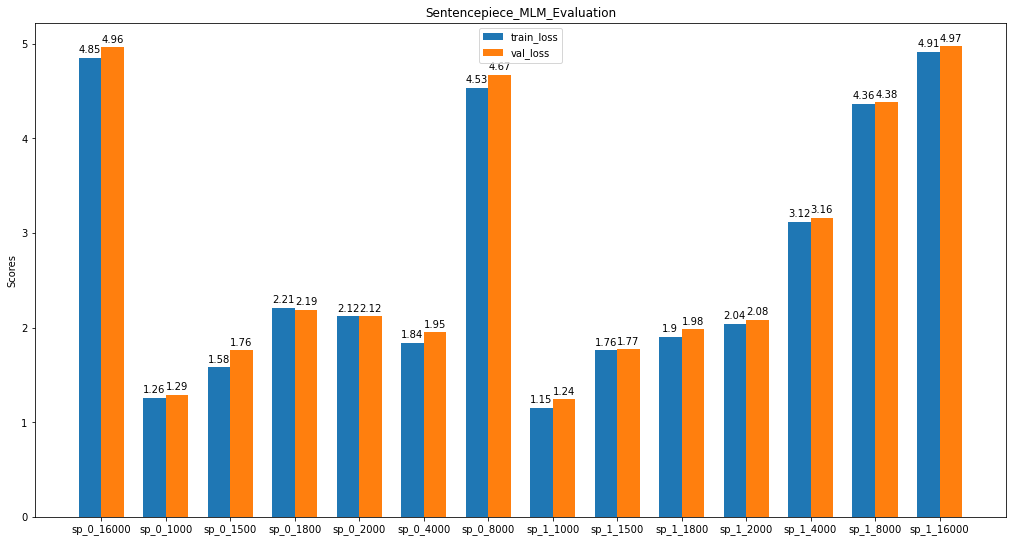

In [403]:
sp_labels = np.array(df_sp[['tokenizer_type', 'training_type', 'vocab_size']])
sp_labels[:,2] = [str(x) for x in sp_labels[:,2]]
sp_labels = ["_".join(x) for x in sp_labels]
sp_train_loss = df_sp['loss'].apply(lambda x: float("%.2f"%x) ).tolist() ### looks awesome!
sp_val_loss = df_sp['eval_loss'].apply(lambda x: float("%.2f"%x) ).tolist()
bar_plt(sp_labels, sp_train_loss, sp_val_loss, title="Sentencepiece_MLM_Evaluation")

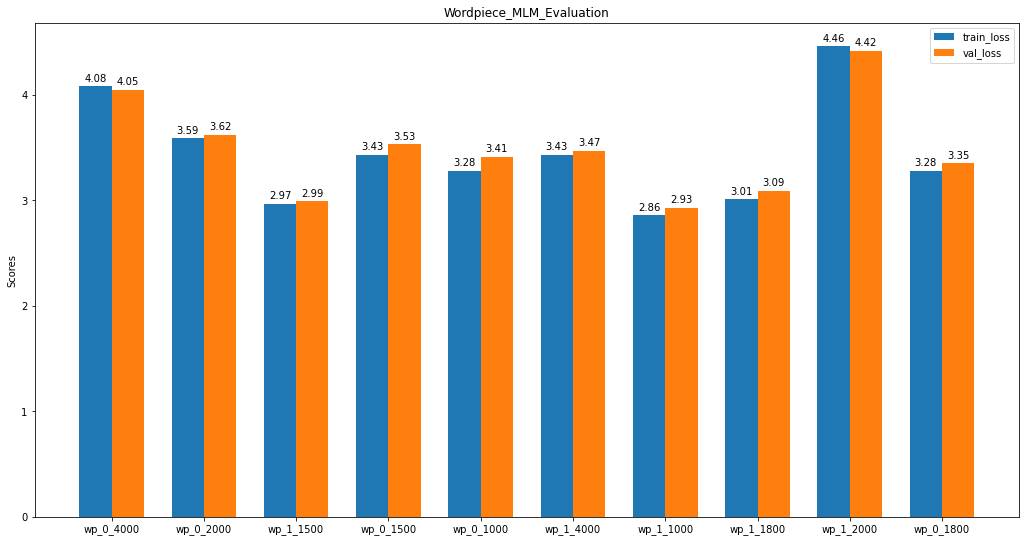

In [432]:
wp_2 = "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/choosing_wordpiece_2"
tokenizers_path_wp_2 = glob(wp_2+"/*/", recursive= True)
#df_ , temp_l= loss_info_df(tokenizers_path=paths_, 
#             df_title="sentencepiece_mlm",
#             save_df = True)
df_wp_2, temp_wp_2 = loss_info_df_(tokenizers_path=tokenizers_path_wp_2, 
              df_title="wordpiece_mlm_loss_table",
             save_df = False)

wp_labels_2 = np.array(df_wp_2[['tokenizer_type', 'training_type', 'vocab_size']])
wp_labels_2[:,2] = [str(x) for x in wp_labels_2[:,2]]
wp_labels_2 = ["_".join(x) for x in wp_labels_2]
wp_2_train_loss = df_wp_2['loss'].apply(lambda x: float("%.2f"%x) ).tolist()
wp_2_val_loss = df_wp_2['eval_loss'].apply(lambda x: float("%.2f"%x) ).tolist()

bar_plt(wp_labels_2, wp_2_train_loss, wp_2_val_loss, title="Wordpiece_MLM_Evaluation")

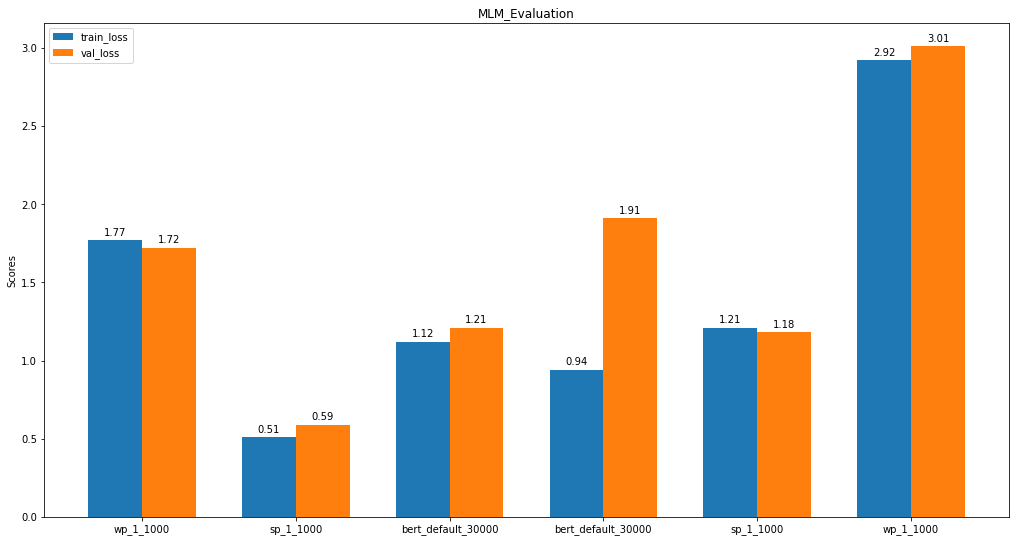

In [457]:
mlm_eval_dir = "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/mlm_evaluation"

mlm_eval = glob(mlm_eval_dir+"/*/", recursive= True)

df_mlm, mlm_list = loss_info_df(tokenizers_path=mlm_eval, 
              df_title="best_mlm_loss_table",
             save_df = False, all_results_only=True)



mlm_best_label = np.array(df_mlm[['tokenizer_type', 'training_type', 'vocab_size']])
mlm_best_label[:,2] = [str(x) for x in mlm_best_label[:,2]]
mlm_best_label = ["_".join(x) for x in mlm_best_label]
mlm_best_train_loss = df_mlm['train_loss'].apply(lambda x: float("%.2f"%x) ).tolist()
mlm_best_val_loss = df_mlm['eval_loss'].apply(lambda x: float("%.2f"%x) ).tolist()

bar_plt(mlm_best_label, mlm_best_train_loss, mlm_best_val_loss, title="MLM_Evaluation")

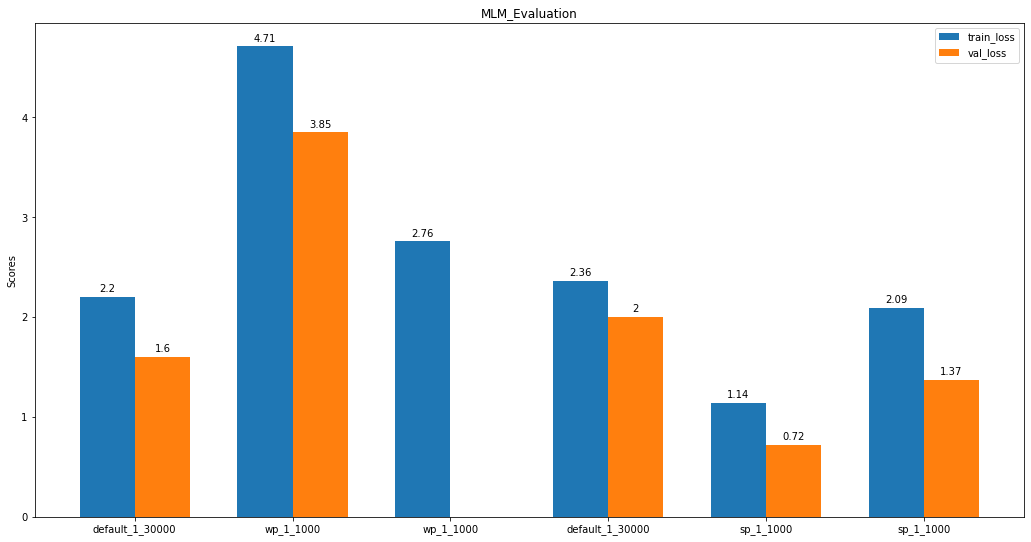

In [459]:
mlm_eval_dir = "/home/fb198/BA/nlp-in-diagnostic-texts-from-nephropathology-master/LanguageModelling/LanguageModelling/mlm_evaluation_2"

mlm_eval = glob(mlm_eval_dir+"/*/", recursive= True)

df_mlm, mlm_list = loss_info_df(tokenizers_path=mlm_eval, 
              df_title="best_mlm_loss_table",
             save_df = False, all_results_only=True)



mlm_best_label = np.array(df_mlm[['tokenizer_type', 'training_type', 'vocab_size']])
mlm_best_label[:,2] = [str(x) for x in mlm_best_label[:,2]]
mlm_best_label = ["_".join(x) for x in mlm_best_label]
mlm_best_train_loss = df_mlm['train_loss'].apply(lambda x: float("%.2f"%x) ).tolist()
mlm_best_val_loss = df_mlm['eval_loss'].apply(lambda x: float("%.2f"%x) ).tolist()

bar_plt(mlm_best_label, mlm_best_train_loss, mlm_best_val_loss, title="MLM_Evaluation")